### ACS visualizations
    

show the relationship between connectivity and various socio-economic stats, like:
- race
- unemployment rate
- median income
- hardship index
- CCVI

In [1]:
import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'..')  # make sure we can import from our package

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
chicago_df = pd.read_csv("../data/chicago_internet.csv",index_col=0,
                      parse_dates=[0])

In [4]:
chicago_df

name  comm_num  total_pop  total_households  hh_no_internet  \
0      Albany Park        14      49806             16909            2674   
1   Archer Heights        57      13726              3919             772   
2    Armour Square        34      13538              5396            1488   
3          Ashburn        70      43356             13124            1840   
4   Auburn Gresham        71      45909             17161            5282   
..             ...       ...        ...               ...             ...   
72       West Lawn        65      31886              9272            1752   
73    West Pullman        53      30020             10598            2176   
74      West Ridge         2      78466             25714            3676   
75       West Town        24      83757             37819            3187   
76        Woodlawn        42      24844             10652            2466   

    hh_no_internet(%)  hh_internet  hh_internet(%)  internet_rr  hh_computer  \
0           15.814064        13488       79.768171    95.582234        15104   
1           19.698903         2886       73.641235    93.340138         3207   
2           27.575982         3685       68.291327    95.867309         4064   
3           14.020116        10449       79.617495    93.637610        11847   
4           30.779092        10394       60.567566    91.346658        13724   
..                ...          ...             ...          ...          ...   
72          18.895600         7094       76.509922    95.405522         7803   
73          20.532176         8101       76.438951    96.971127         8972   
74          14.295714        20875       81.181458    95.477172        23515   
75           8.426981        33590       88.817790    97.244771        35289   
76          23.150582         7913       74.286519    97.437101         8767   

    ...  total_hispanic(%)  total_black  total_black(%)  total_white  \
0   ...          44.972493         2461        4.941172        16040   
1   ...          77.415125          131        0.954393         2109   
2   ...           4.321170         1135        8.383809         1878   
3   ...          41.327613        19888       45.871390         4110   
4   ...           2.180400        43791       95.386526          524   
..  ...                ...          ...             ...          ...   
72  ...          83.971022          845        2.650066         4028   
73  ...           5.203198        27579       91.868754          290   
74  ...          18.906278         9086       11.579538        31836   
75  ...          22.167699         5727        6.837637        53095   
76  ...           3.364998        20554       82.732249         1937   

    total_white(%)  total_asian  total_asian(%)  ccvi_score  ccvi_cat  \
0        32.204955         7391       14.839578        38.2    MEDIUM   
1        15.365001          819        5.966778        53.3      HIGH   
2        13.872064         9886       73.024080        30.9       LOW   
3         9.479657          410        0.945659        45.1    MEDIUM   
4         1.141388          141        0.307129        48.2      HIGH   
..             ...          ...             ...         ...       ...   
72       12.632503          142        0.445337        48.5      HIGH   
73        0.966023            0        0.000000        49.2      HIGH   
74       40.572987        18650       23.768256        36.0    MEDIUM   
75       63.391717         4125        4.924961        18.2       LOW   
76        7.796651          895        3.602479        37.8    MEDIUM   

    hardship_score  
0             53.0  
1             67.0  
2             82.0  
3             37.0  
4             74.0  
..             ...  
72            56.0  
73            62.0  
74            46.0  
75            10.0  
76            58.0  

[77 rows x 30 columns]

(50.0, 105.0)

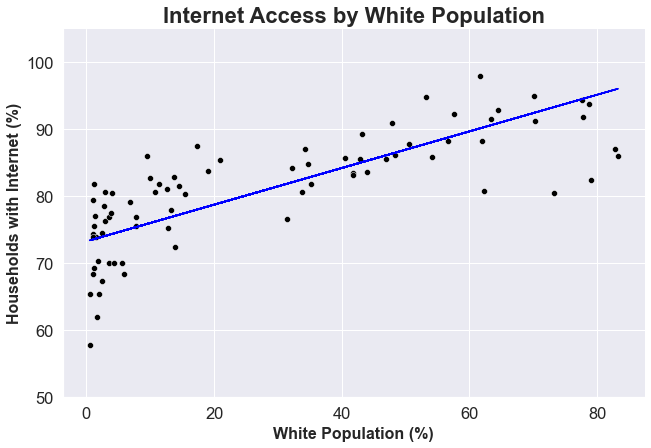

In [5]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["total_white(%)"]

sns.set(font_scale = 1.5)

sns.relplot(x=x, y=y,
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.title("Internet Access by White Population" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('White Population (%)', size=16, weight=900)

plt.ylim(50, 105)

Text(0.5, 15.439999999999998, 'Non-White Population (%)')

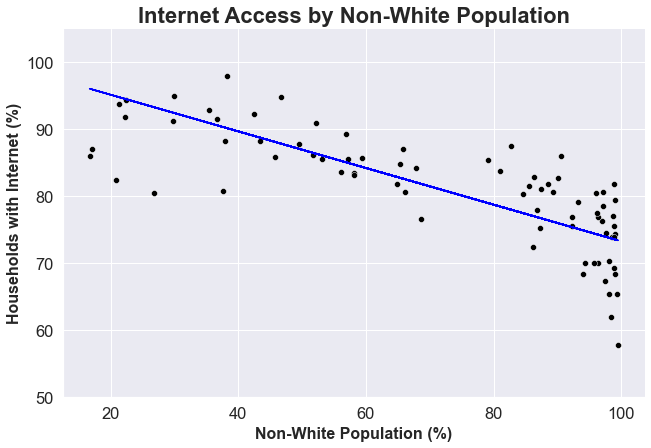

In [6]:
Population_Size = chicago_df["total_pop"]

y=100 - chicago_df["hh_no_internet(%)"]
x=100-chicago_df["total_white(%)"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y,
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(50, 105)

plt.title("Internet Access by Non-White Population" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Non-White Population (%)', size=16, weight=900)

Text(0.5, 15.439999999999998, 'Asian Population (%)')

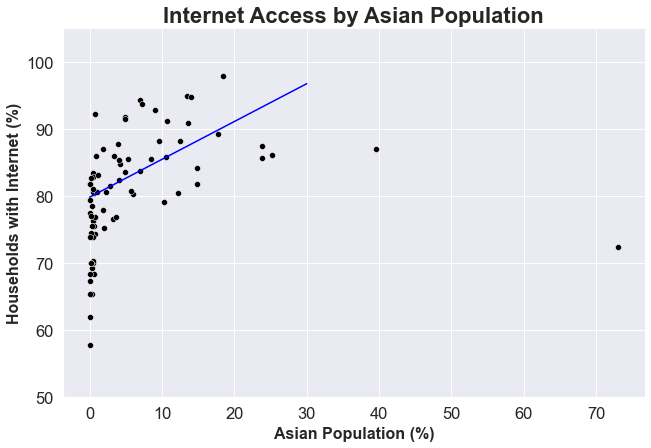

In [7]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["total_asian(%)"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y,
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(np.array([0,30]), a*np.array([0,30])+b, color = 'blue')

plt.ylim(50, 105)

plt.title("Internet Access by Asian Population" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Asian Population (%)', size=16, weight=900)

Text(0.5, 15.439999999999998, 'Black or African American Population (%)')

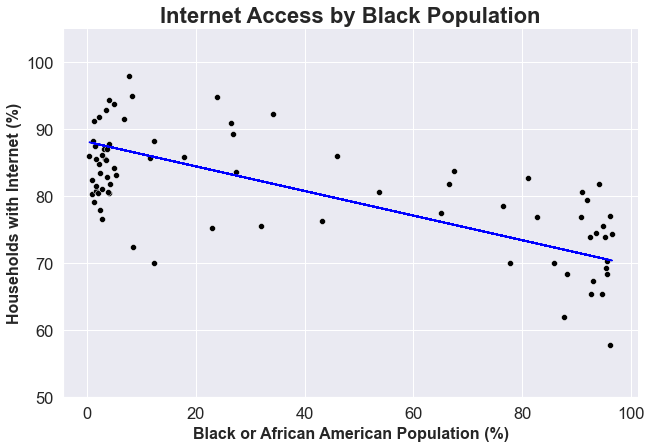

In [8]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["total_black(%)"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y,
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(50, 105)

plt.title("Internet Access by Black Population" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Black or African American Population (%)', size=16, weight=900)

Text(0.5, 15.439999999999998, 'Hispanic Population (%)')

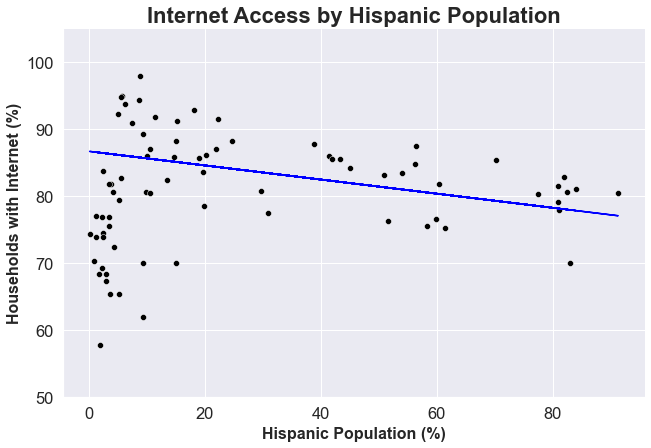

In [9]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["total_hispanic(%)"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y, 
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(50, 105)

plt.title("Internet Access by Hispanic Population" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Hispanic Population (%)', size=16, weight=900)

Text(0.5, 15.439999999999998, 'Unemployment Rate (%)')

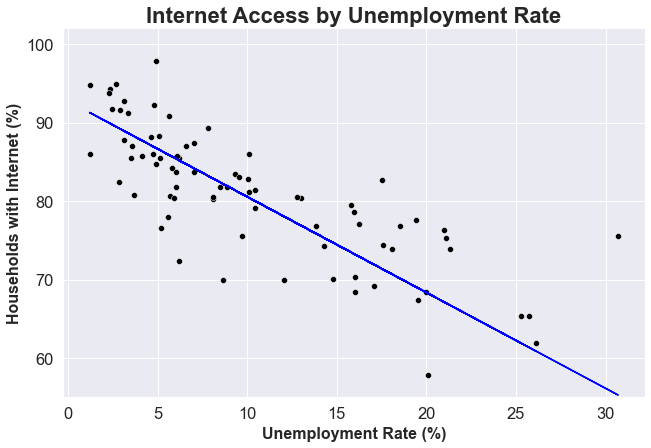

In [10]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["hh_unemployment(%)"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y,
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(55, 102)

plt.title("Internet Access by Unemployment Rate" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Unemployment Rate (%)', size=16, weight=900)

Text(0.5, 15.439999999999998, 'Household Median Income ($)')

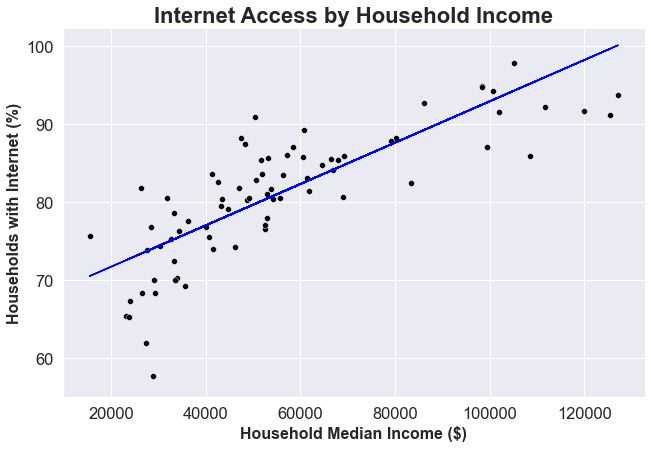

In [11]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["hh_median_income"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y,
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(55, None)

plt.title("Internet Access by Household Income" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Household Median Income ($)', size=16, weight=900)


Text(0.5, 15.439999999999998, 'Community Area Hardship Index')

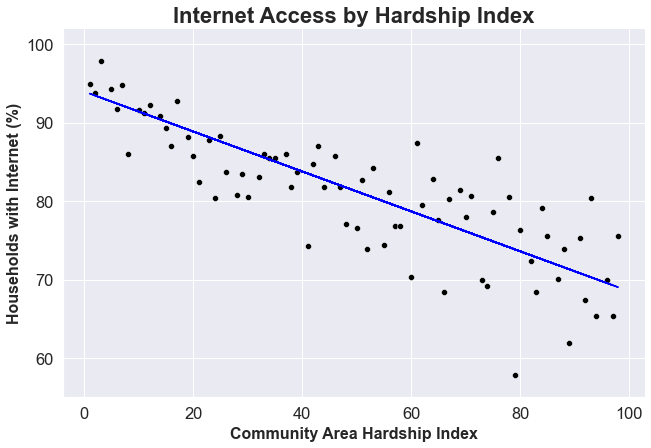

In [12]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["hardship_score"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y,
            sizes=(0, 300), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(55, 102)

plt.title("Internet Access by Hardship Index" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Community Area Hardship Index', size=16, weight=900)


Text(0.5, 15.439999999999998, 'Community Area CCVI')

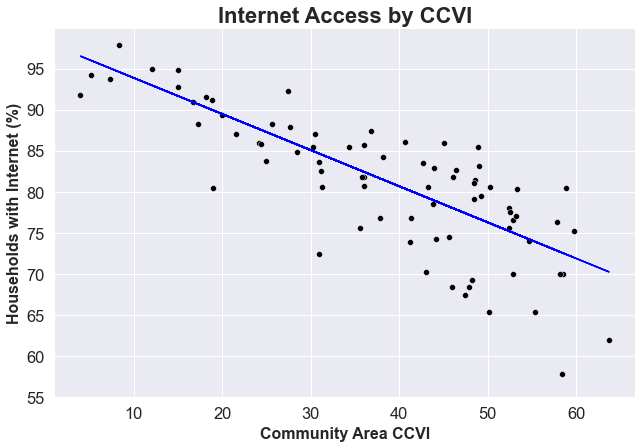

In [13]:
y=100 - chicago_df["hh_no_internet(%)"]
x=chicago_df["ccvi_score"]
sns.set(font_scale = 1.5)

g= sns.relplot(x=x, y=y,
            sizes=(500, 800), alpha=1, palette="deep", height=6, data= chicago_df, color = 'black', aspect=1.5)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b, color = 'blue')

plt.ylim(55, None)

plt.title("Internet Access by CCVI" , size =22, weight=900)
plt.ylabel('Households with Internet (%)', size=16, weight=900)
plt.xlabel('Community Area CCVI', size=16, weight=900)


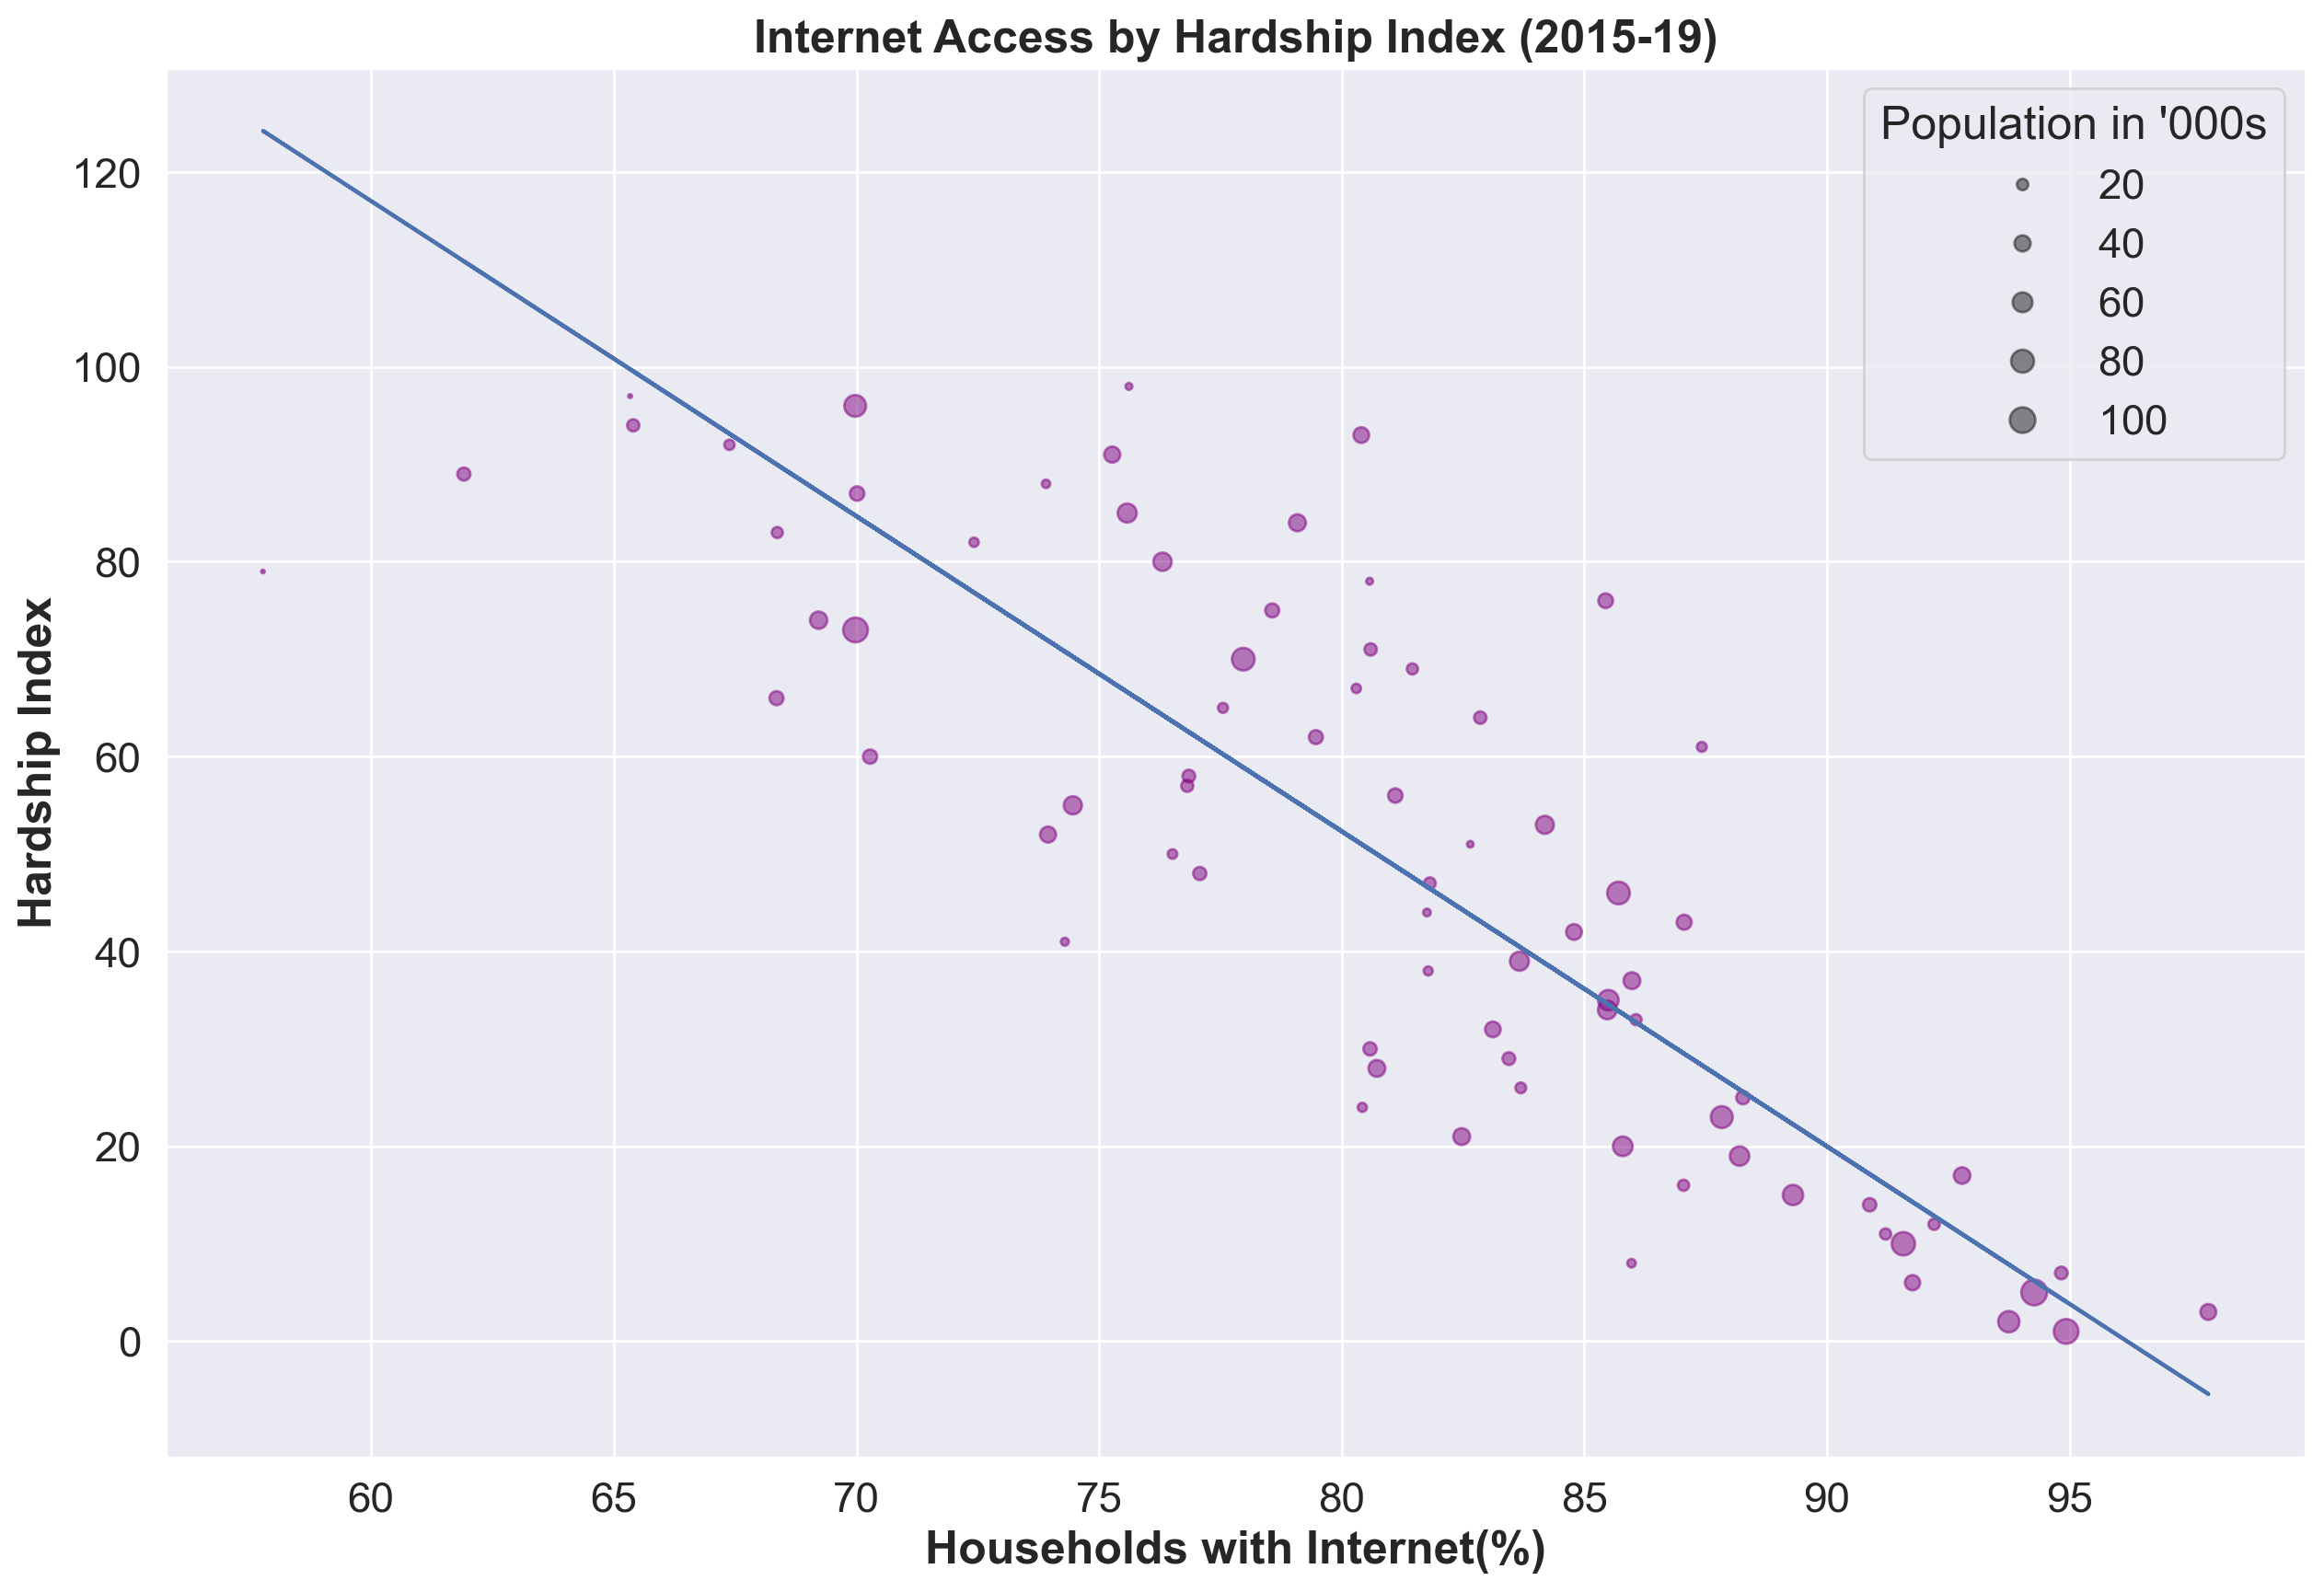

In [14]:
plt.figure(figsize=(15, 10), dpi=200)
x=100-chicago_df["hh_no_internet(%)"]
y=chicago_df["hardship_score"]

scatter = plt.scatter(x=100-chicago_df["hh_no_internet(%)"],
            y=chicago_df["hardship_score"],
           c="purple", alpha=0.5, s=chicago_df["total_pop"]/1000)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b)

plt.xlabel("Households with Internet(%)",weight = "bold")
plt.ylabel("Hardship Index",weight = "bold")
plt.title("Internet Access by Hardship Index (2015-19)", weight = "bold")
plt.legend(title="Population in '000s",*scatter.legend_elements("sizes", num=6))

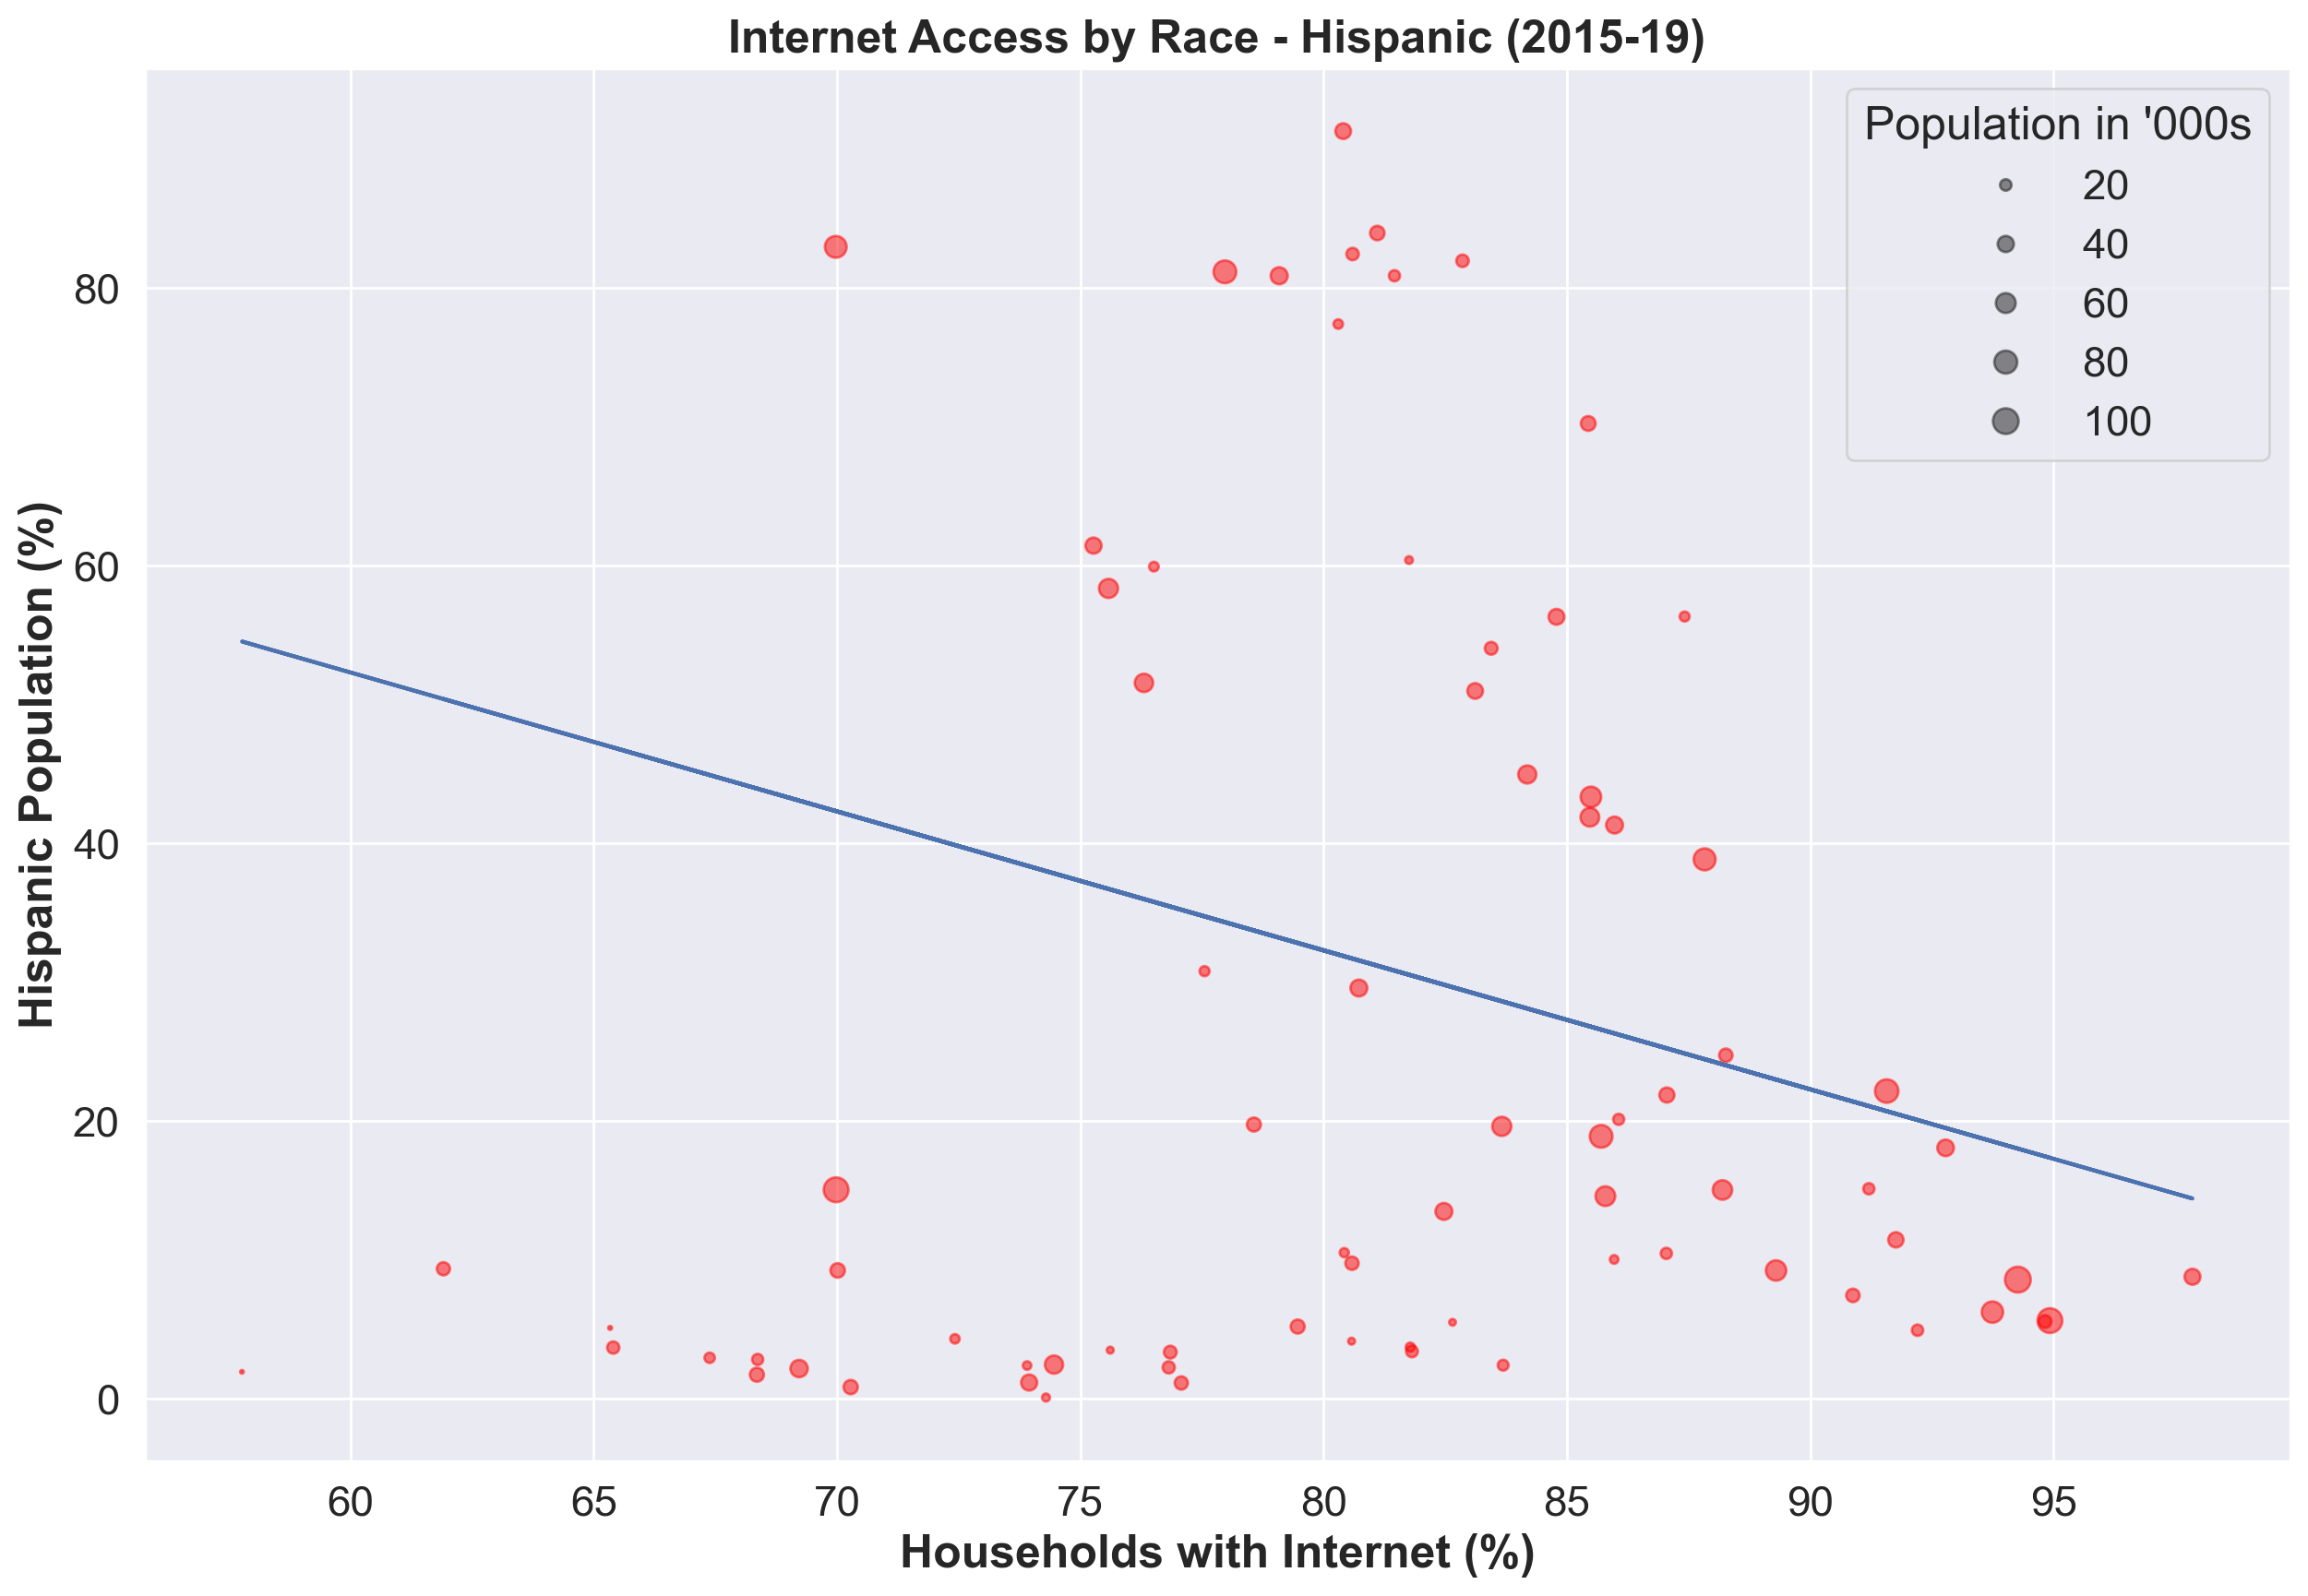

In [15]:
plt.figure(figsize=(15, 10), dpi=200)

x=100 -chicago_df["hh_no_internet(%)"]
y=chicago_df["total_hispanic(%)"]

scatter = plt.scatter(x=100 -chicago_df["hh_no_internet(%)"],
            y=chicago_df["total_hispanic(%)"],
           c="red", alpha=0.5, s = chicago_df["total_pop"]/1000)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b)
plt.xlabel("Households with Internet (%)",weight = "bold")
plt.ylabel("Hispanic Population (%)",weight = "bold")
plt.title("Internet Access by Race - Hispanic (2015-19)", weight = "bold")
plt.legend(title="Population in '000s",*scatter.legend_elements("sizes", num=6))

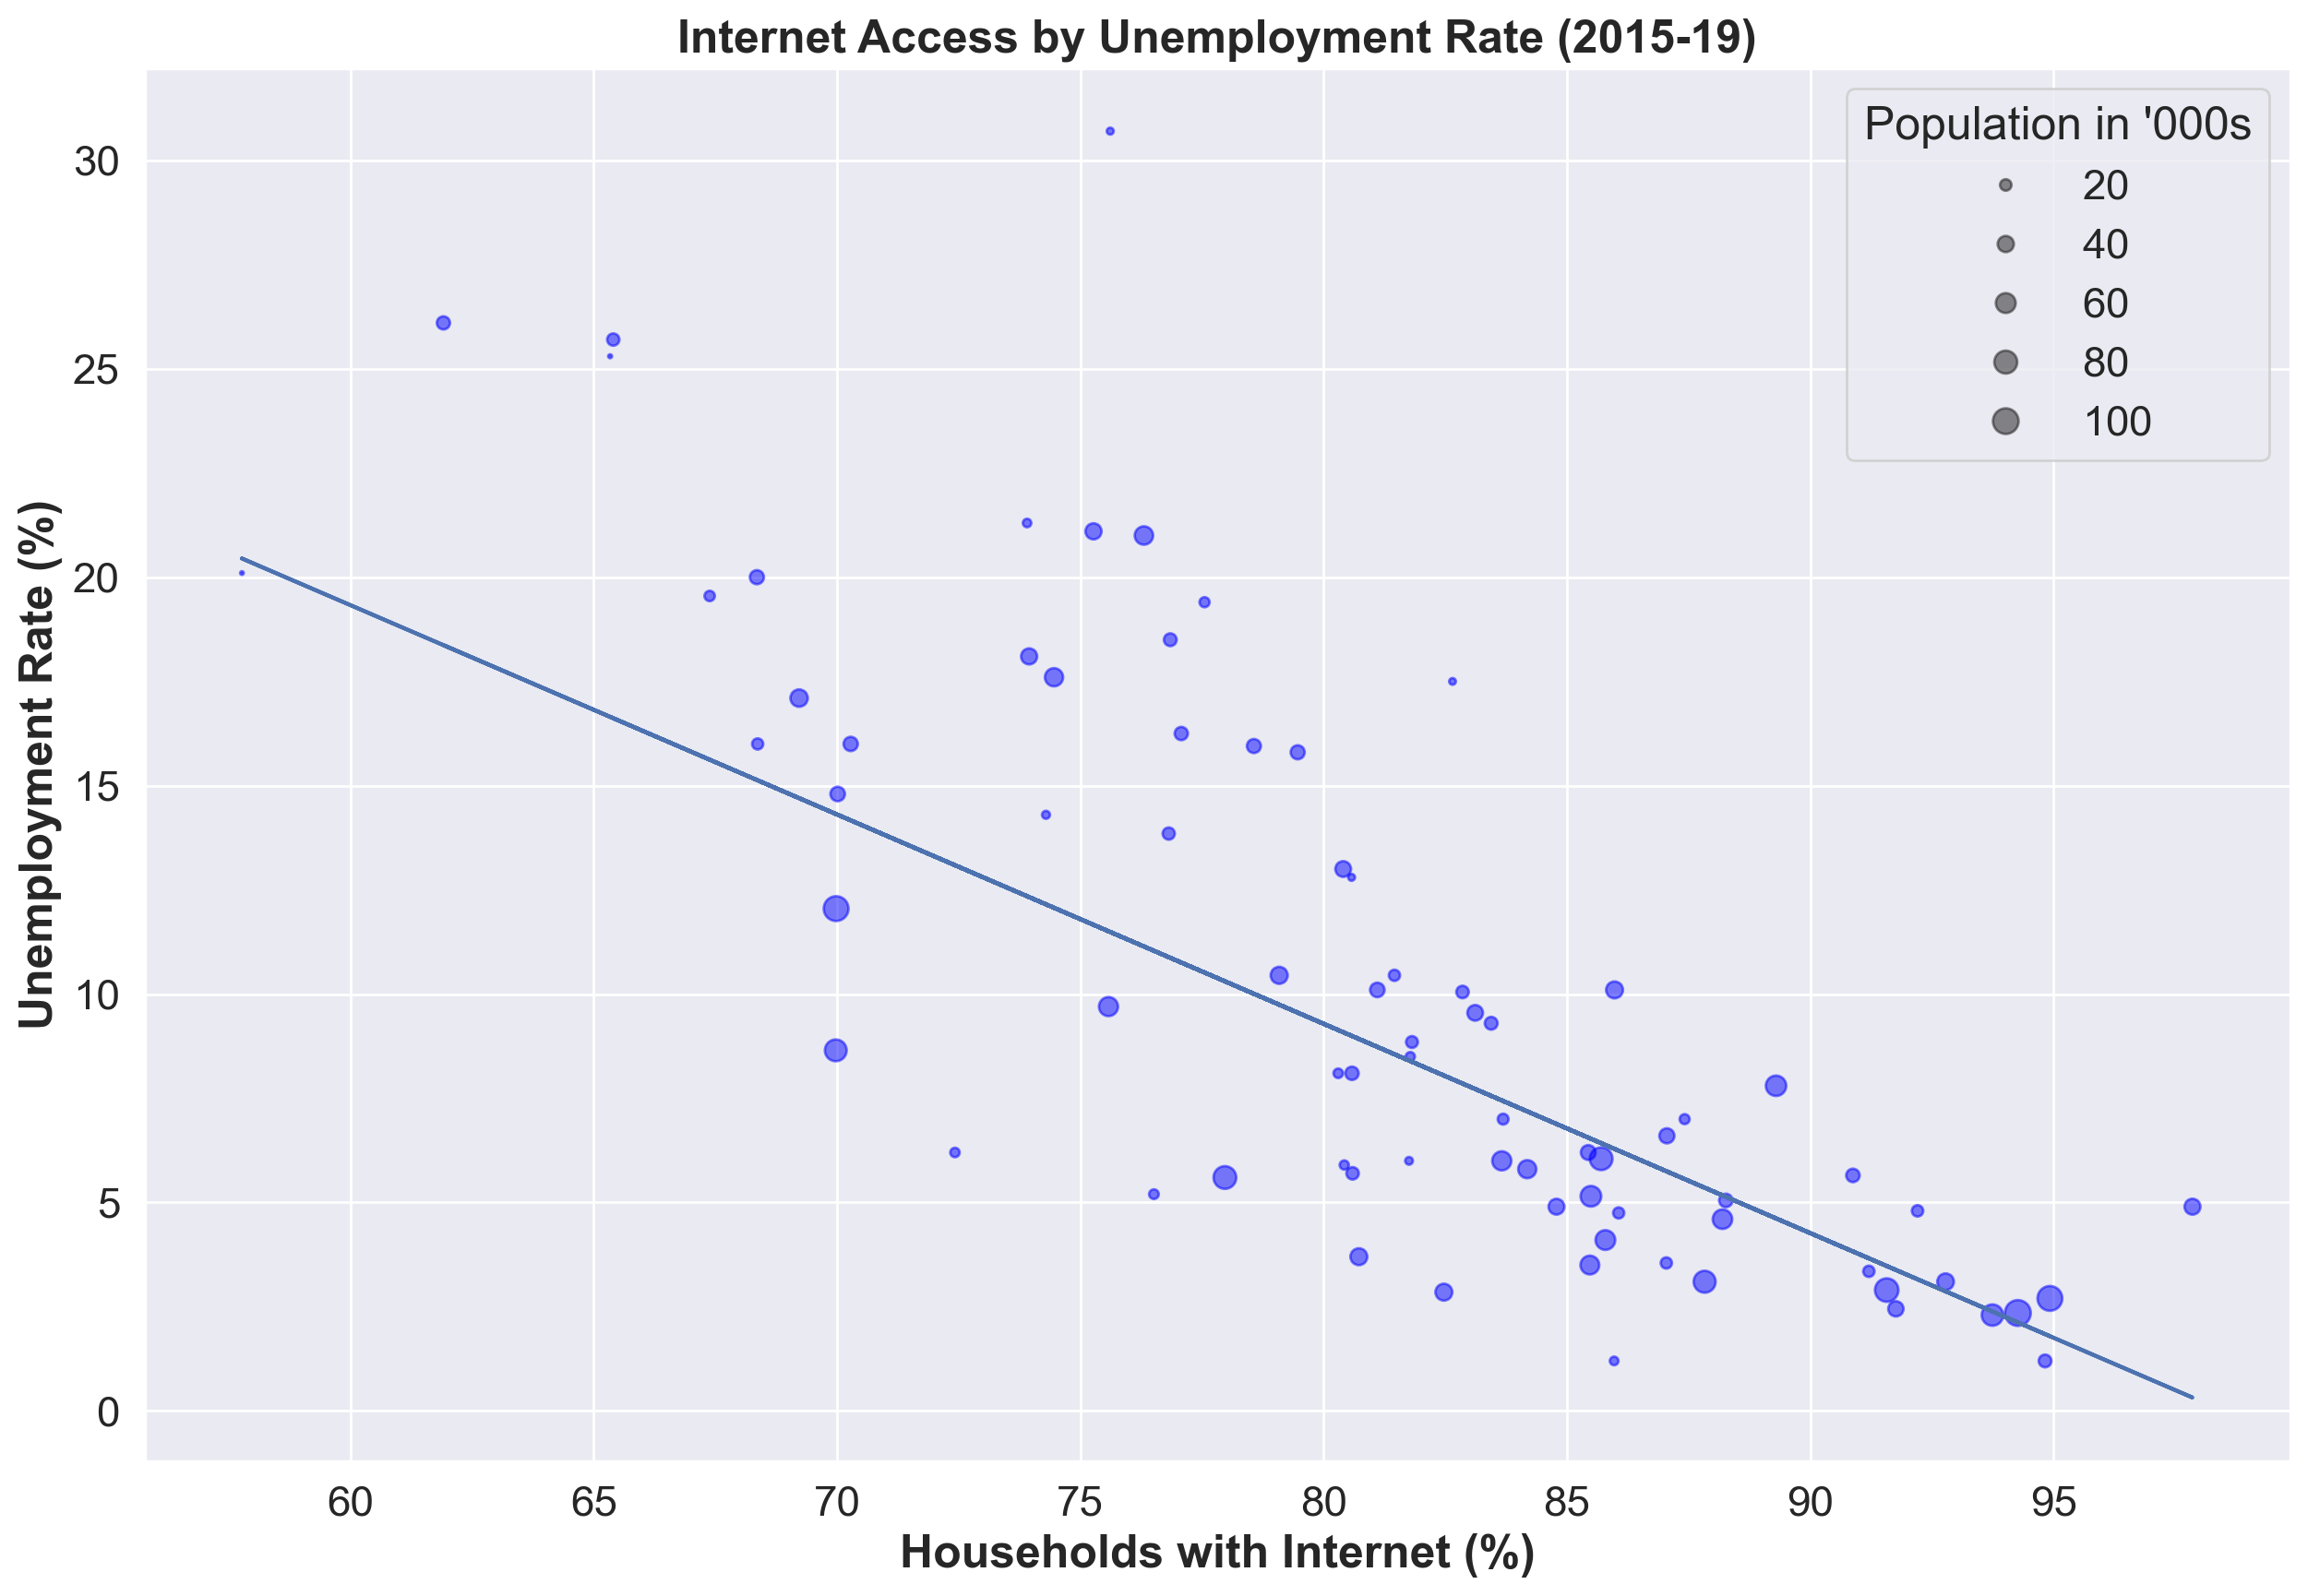

In [16]:
plt.figure(figsize=(15, 10), dpi=200)

x=100-chicago_df["hh_no_internet(%)"]
y=chicago_df["hh_unemployment(%)"]

scatter = plt.scatter(x=100-chicago_df["hh_no_internet(%)"],
            y=chicago_df["hh_unemployment(%)"],
           c="blue", alpha=0.5, s = chicago_df["total_pop"]/1000)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b)

plt.xlabel("Households with Internet (%)",weight = "bold")
plt.ylabel("Unemployment Rate (%)",weight = "bold")
plt.title("Internet Access by Unemployment Rate (2015-19)", weight = "bold")
plt.legend(title="Population in '000s",*scatter.legend_elements("sizes", num=6))

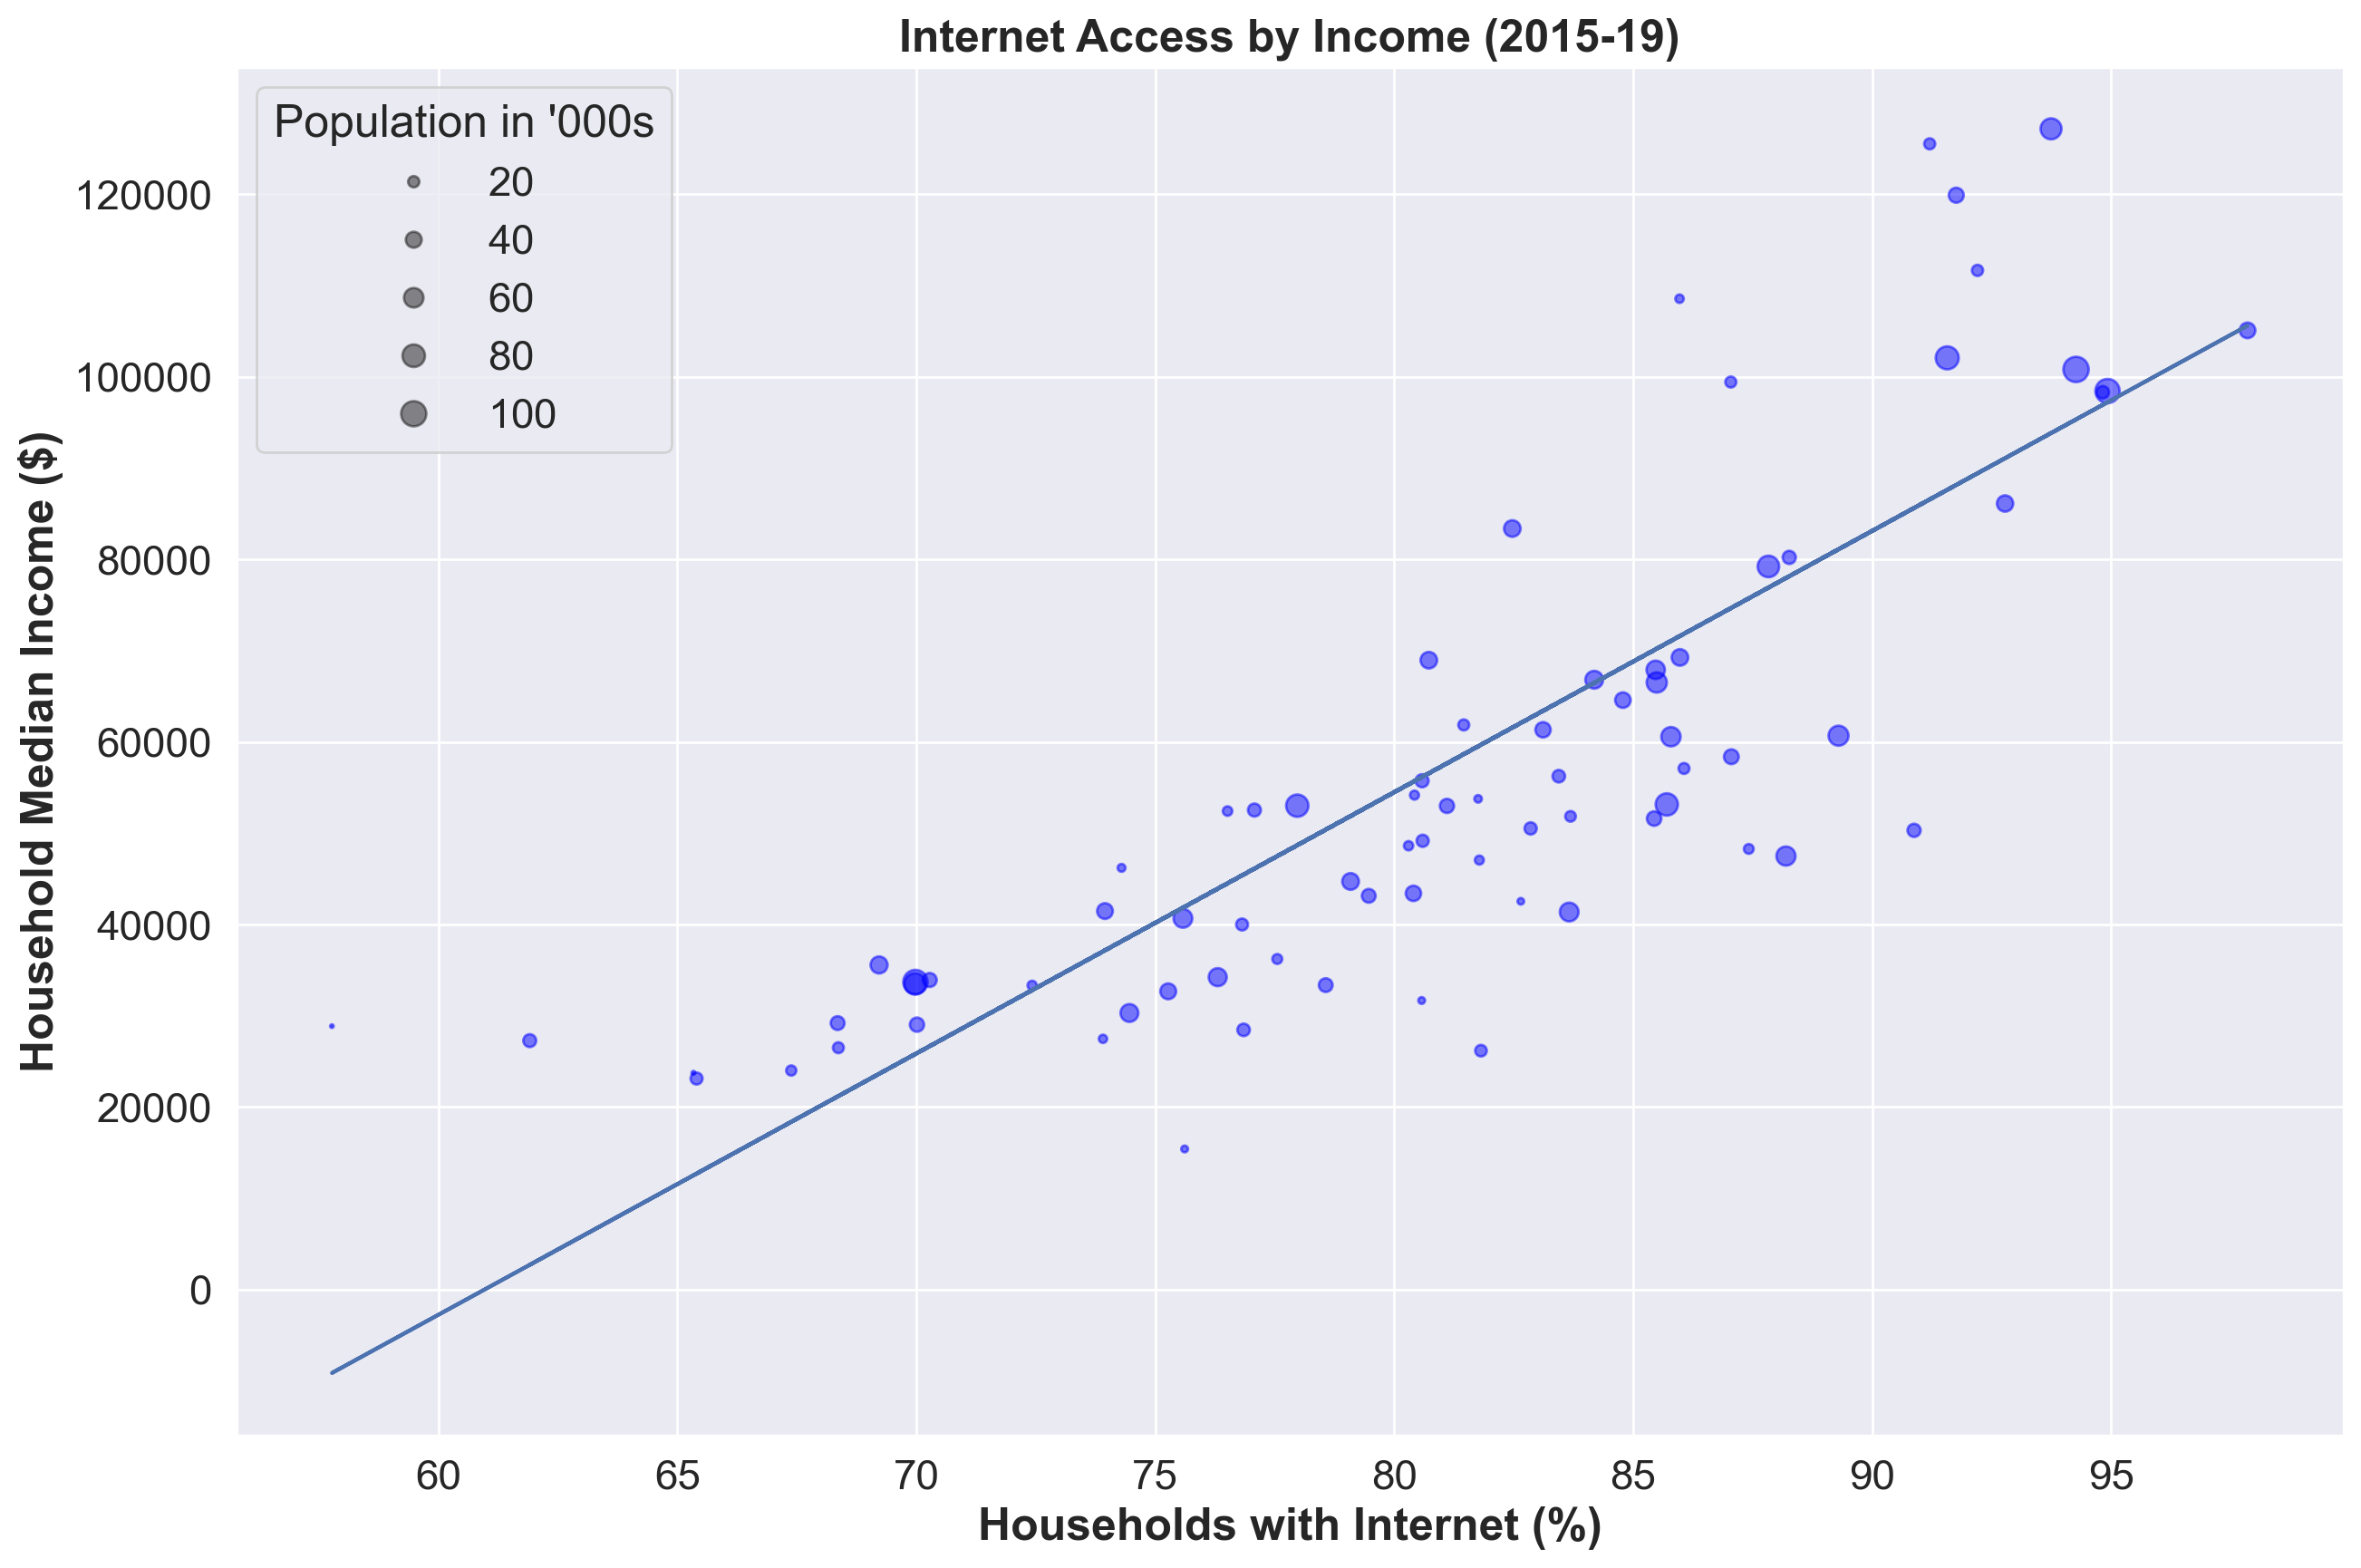

In [17]:
plt.figure(figsize=(15, 10), dpi=200)

x=100-chicago_df["hh_no_internet(%)"]
y=chicago_df["hh_median_income"]

scatter = plt.scatter(x=100-chicago_df["hh_no_internet(%)"],
            y=chicago_df["hh_median_income"],
           c="blue", alpha=0.5, s = chicago_df["total_pop"]/1000)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b)

plt.xlabel("Households with Internet (%)",weight = "bold")
plt.ylabel("Household Median Income ($)",weight = "bold")
plt.title("Internet Access by Income (2015-19)", weight = "bold")
plt.legend(title="Population in '000s",*scatter.legend_elements("sizes", num=6))

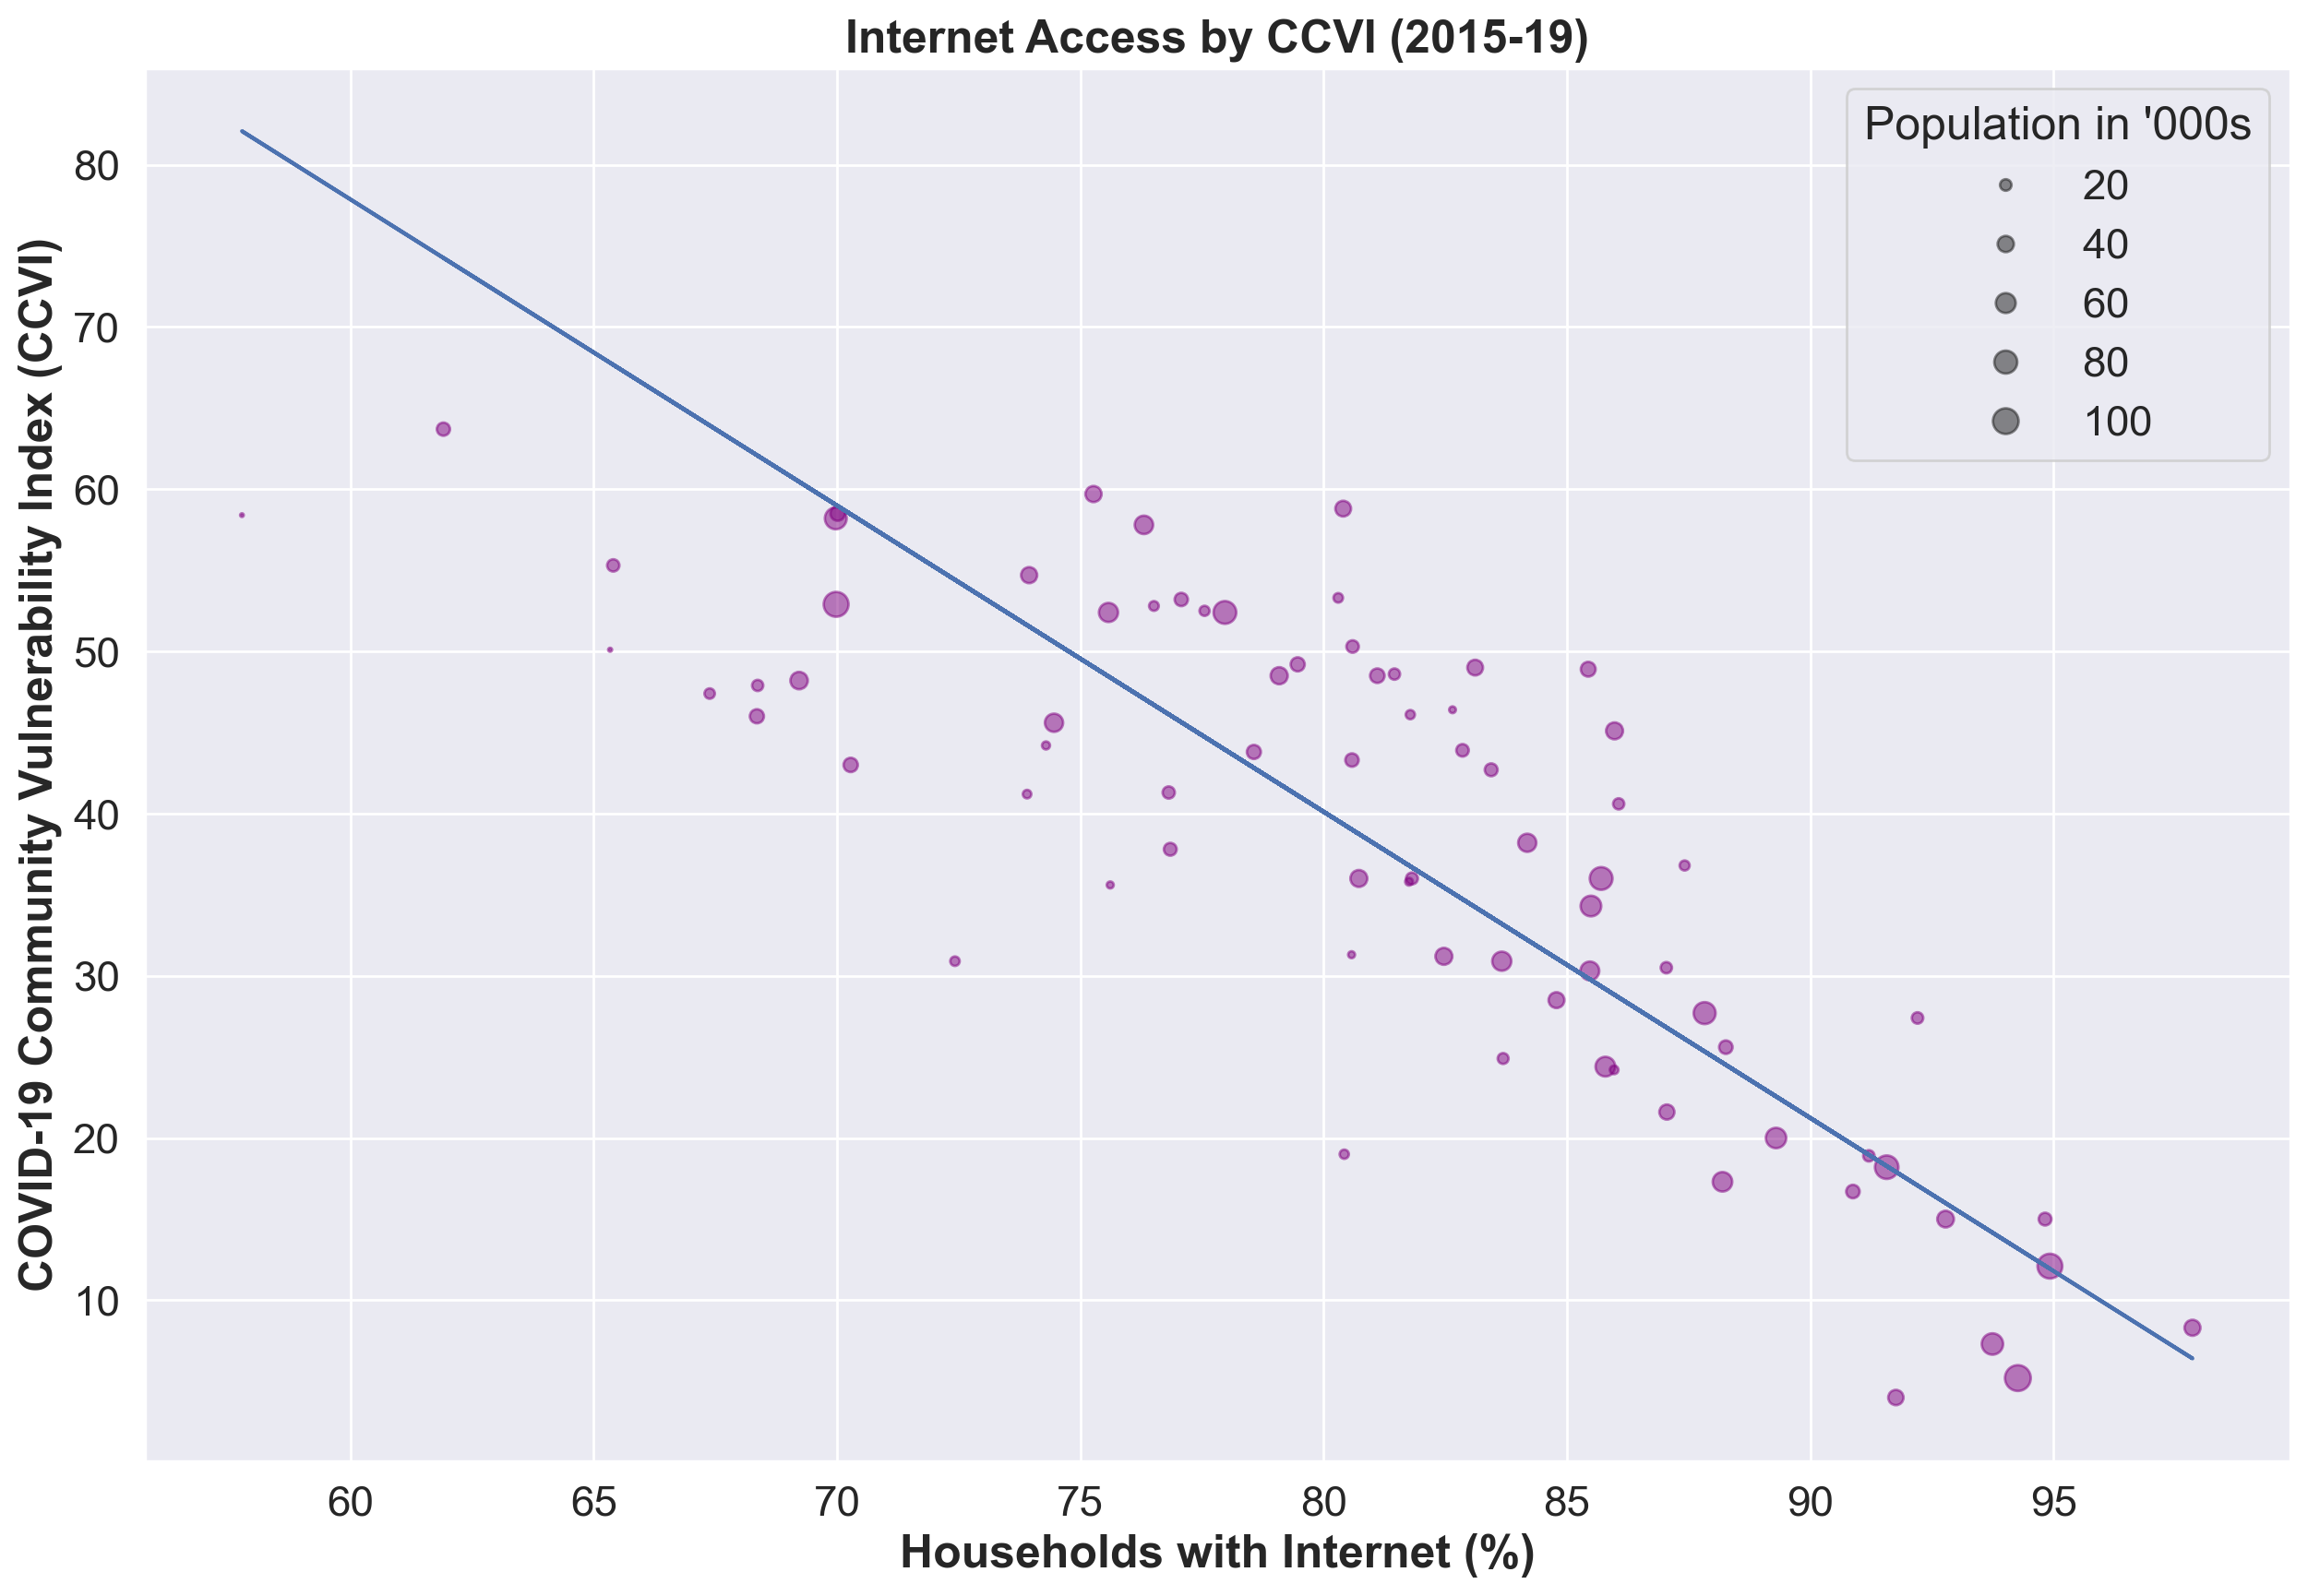

In [18]:
plt.figure(figsize=(15, 10), dpi=200)

x = 100-chicago_df["hh_no_internet(%)"]
y = chicago_df["ccvi_score"]

scatter = plt.scatter(x,y,c="purple", alpha=0.5, s = chicago_df["total_pop"]/1000)

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b)

plt.xlabel("Households with Internet (%)",weight = "bold")
plt.ylabel("COVID-19 Community Vulnerability Index (CCVI)",weight = "bold")
plt.title("Internet Access by CCVI (2015-19)", weight = "bold")
plt.legend(title="Population in '000s",*scatter.legend_elements("sizes", num=6))

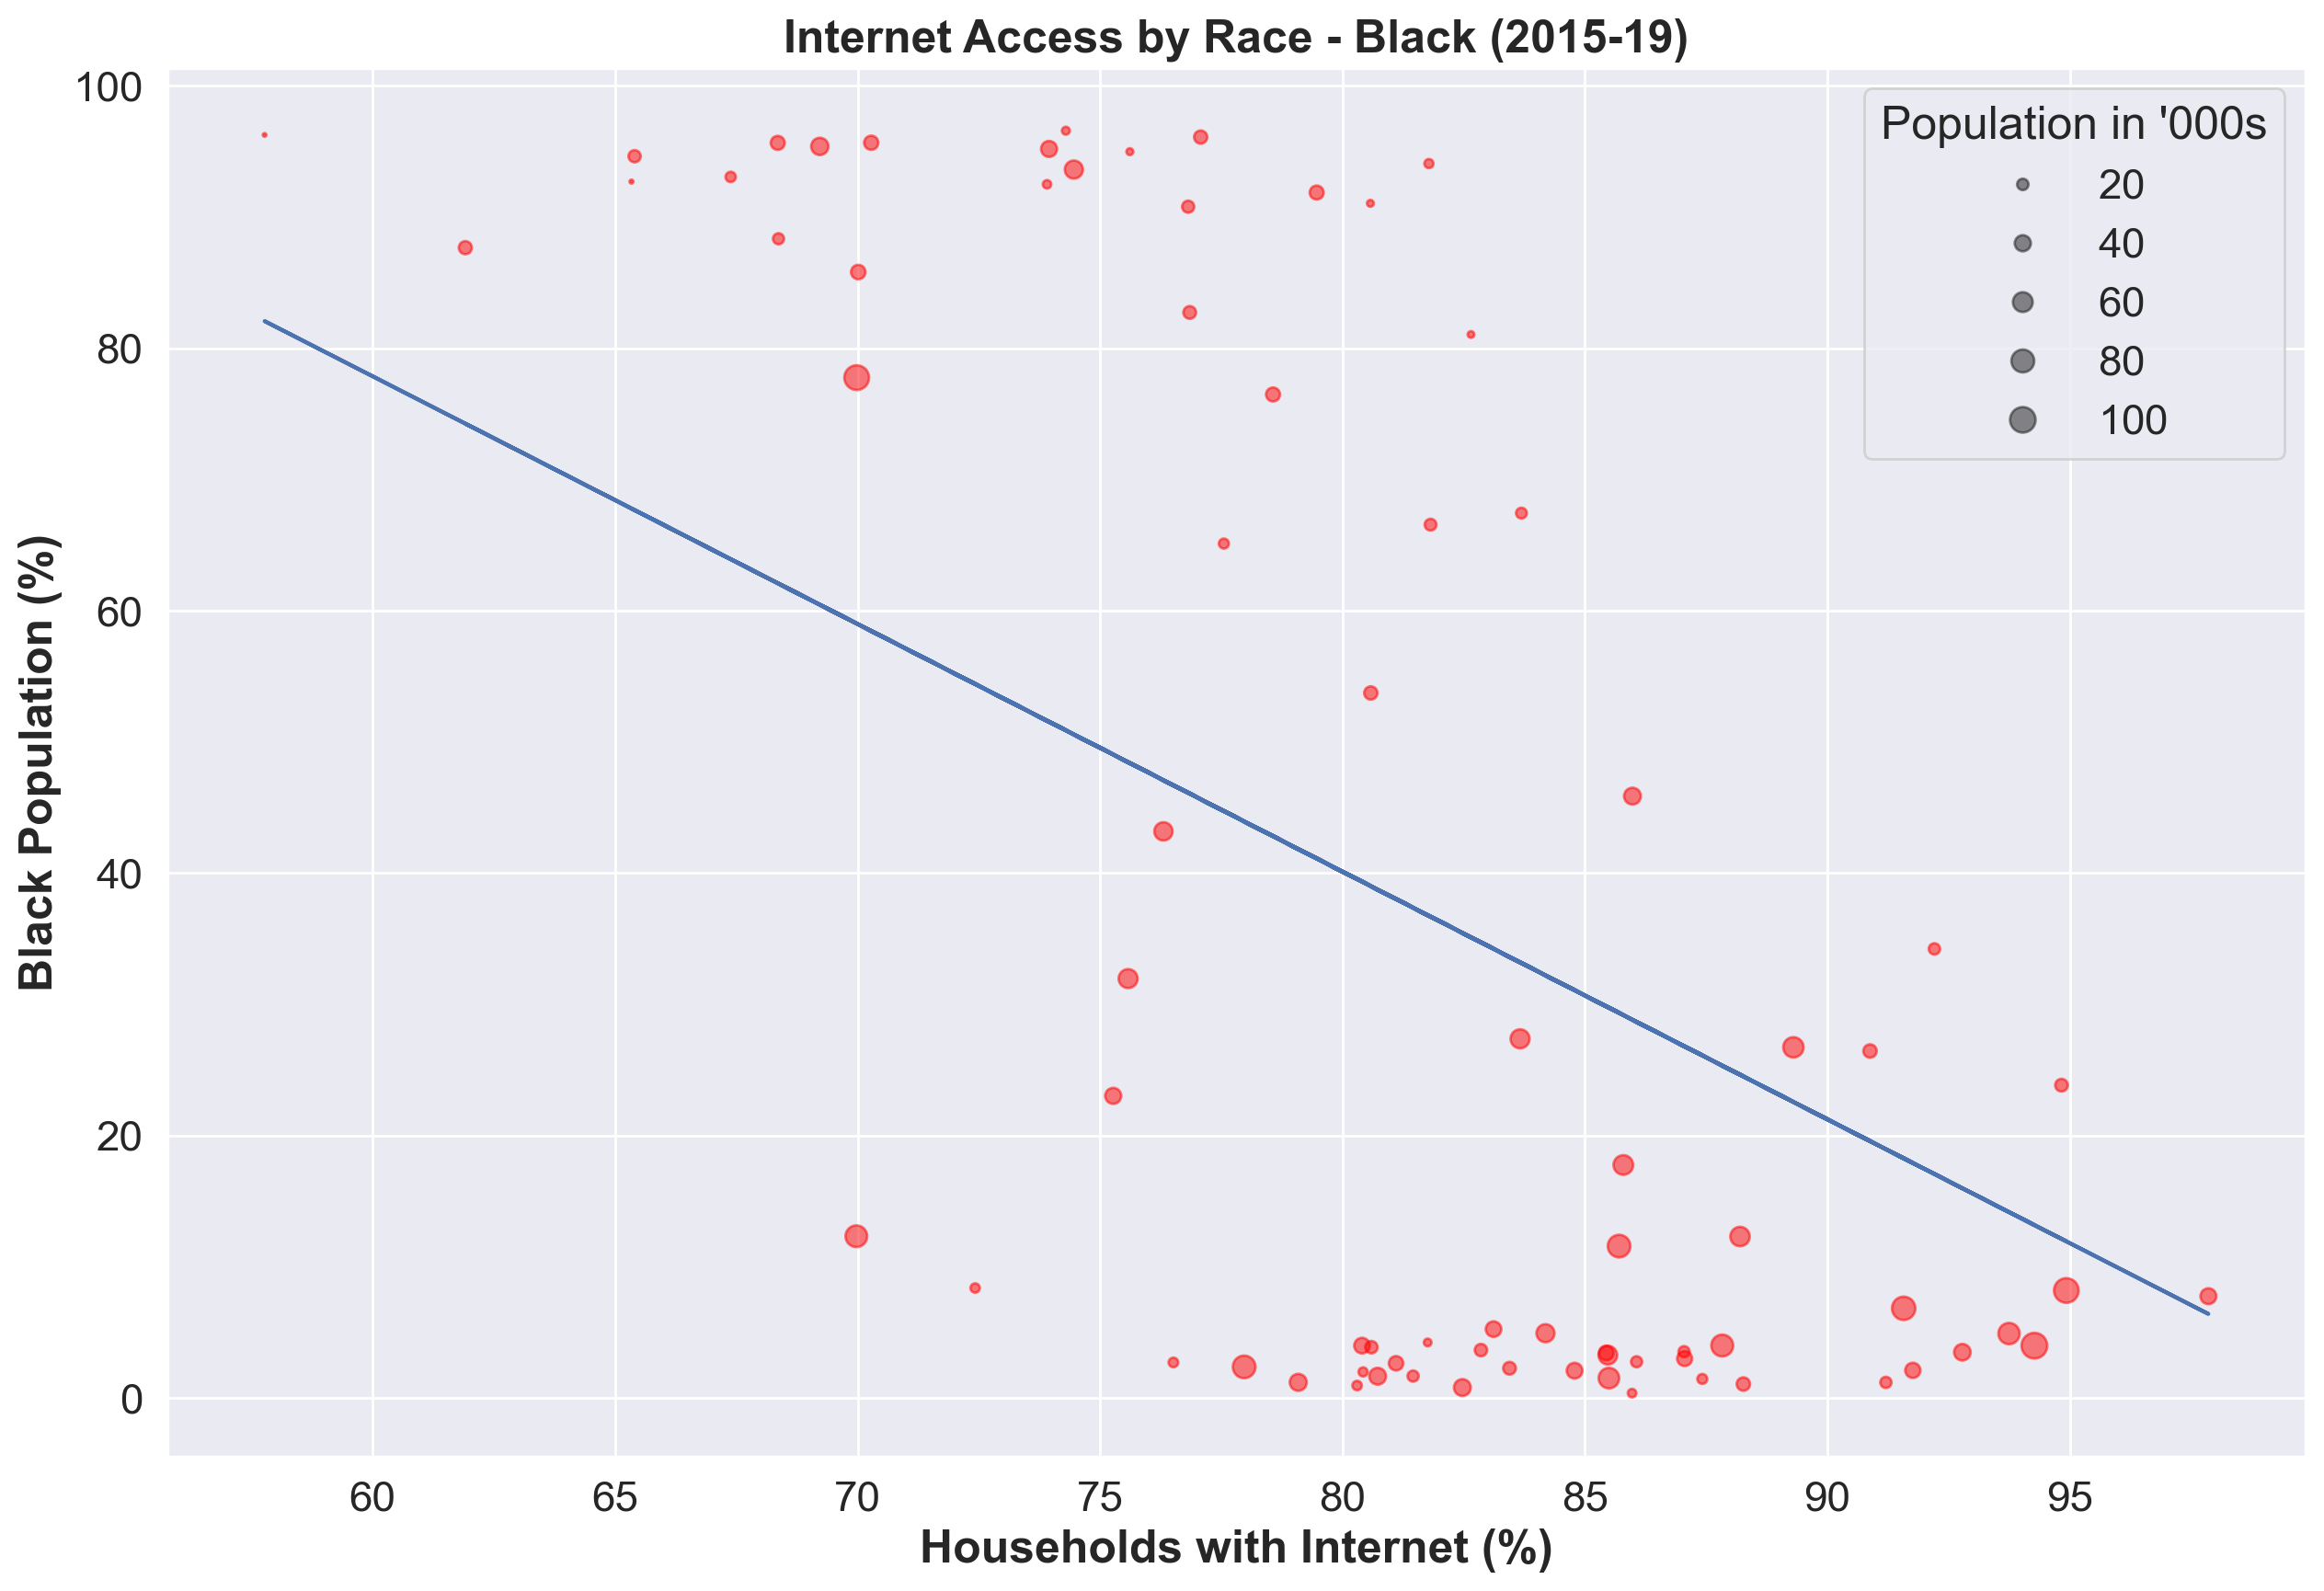

In [19]:
plt.figure(figsize=(15, 10), dpi=200)

scatter = plt.scatter(x=100 - chicago_df["hh_no_internet(%)"],
   y=chicago_df["total_black(%)"],
   c="red", alpha=0.5, s = chicago_df["total_pop"]/1000
   )

a, b = np.polyfit(x, y, 1, w = chicago_df["total_pop"])
plt.plot(x, a*x+b)

plt.xlabel("Households with Internet (%)", weight = "bold")
plt.ylabel("Black Population (%)",weight = "bold")
plt.title("Internet Access by Race - Black (2015-19)",weight = "bold" )
plt.legend(title="Population in '000s",*scatter.legend_elements("sizes", num=6))